# Hands On ML C3 Classification

#Trained by RozySky

In [110]:
from IPython.display import IFrame


In [111]:
IFrame('https://www.youtube.com/embed/PkIaVNf5UM4', width=560, height=315)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
from sklearn.datasets import fetch_openml

In [60]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [61]:
data = mnist['data']
targets = mnist['target']
data.shape

(70000, 784)

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt

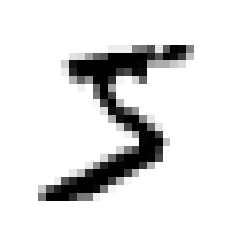

In [63]:
random_digit = data[0]
random_digit_image = random_digit.reshape(28,28)
plt.imshow(random_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis('off')
plt.show()

In [64]:
targets = targets.astype(np.uint8)

In [65]:
targets[0]

5

In [66]:
data_train_x = data[:60000]
data_train_y = targets[:60000]
data_test_x = data[60000:]
data_test_y = targets[60000:]
data_train_5_y = (data_train_y == 5) # Returns Bool List with True & False , Binary !
data_test_5_y = (data_test_y == 5) # Returns Bool List with True & False , Binary !

In [67]:
from sklearn.linear_model import SGDClassifier

In [68]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(data_train_x, data_train_5_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
some_digit = 5
sgd_model.predict([random_digit])

array([ True])

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
cross_val_score(sgd_model, data_train_x, data_train_5_y, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [72]:
from sklearn.model_selection import cross_val_predict

In [73]:
y_train_pred = cross_val_predict(sgd_model, data_train_x, data_train_5_y, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
returned_confusion = confusion_matrix(data_train_5_y, y_train_pred)
returned_confusion

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [76]:
 # Lets Check what will happen if I give give perfect predictions, The 2nd Diag should contain 0s
perfect_confusion = confusion_matrix(data_train_5_y, data_train_5_y)
perfect_confusion

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [77]:
# Calculating Precision & Recall Of the matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [78]:
precision = precision_score(data_train_5_y, y_train_pred)
recall = recall_score(data_train_5_y, y_train_pred)
precision, recall

(0.8370879772350012, 0.6511713705958311)

In [79]:
F1_harmonic_mean_score = f1_score(data_train_5_y, y_train_pred)
F1_harmonic_mean_score

0.7325171197343846

In [80]:
# Lets look At the Decision Threshold of SGD Classifier
threshold_score = sgd_model.decision_function([random_digit])
threshold_score

array([2164.22030239])

In [81]:
pard = (threshold_score > 0)
pard # Here less accuracy & More recall !

array([ True])

In [82]:
pard = (threshold_score > 8000)
pard

array([False])

In [83]:
decision_scores = cross_val_predict(sgd_model, data_train_x, data_train_5_y, cv=3,method="decision_function")
decision_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [84]:
from sklearn.metrics import precision_recall_curve


In [85]:
precisions, recalls, thresholds = precision_recall_curve(data_train_5_y, decision_scores)

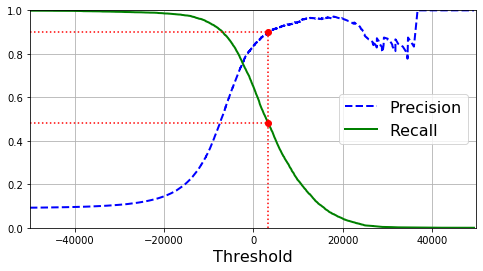

In [86]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                               
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                          
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                                    # Not shown
plt.show()

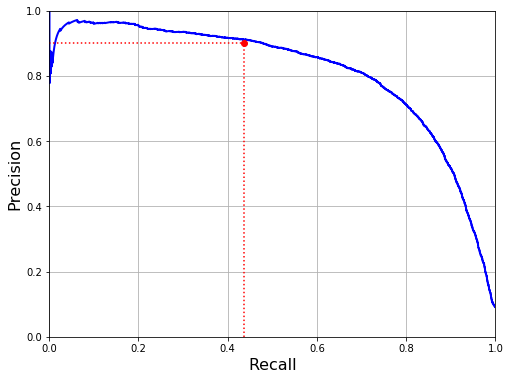

In [87]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

In [88]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439594

In [89]:
results = (decision_scores >= threshold_90_precision)
results

array([False, False, False, ...,  True, False, False])

In [90]:
# Lets check precision & recall on this threshold (:
prec = precision_score(data_train_5_y, results)
recl = recall_score(data_train_5_y, results)
prec,recl

(0.9000345901072293, 0.4799852425751706)

In [91]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(data_train_5_y, decision_scores)

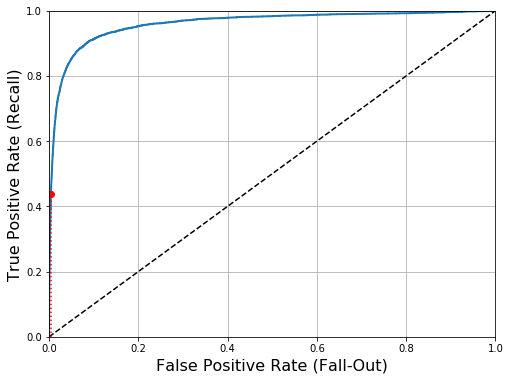

In [92]:

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                  
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
plt.show()

In [93]:
from sklearn.metrics import roc_auc_score

In [94]:
score = roc_auc_score(data_train_5_y, decision_scores)
score

0.9604938554008616

In [95]:
# Ensemble Learning Time
from sklearn.ensemble import RandomForestClassifier

In [98]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, data_train_x, data_train_5_y, cv=3,method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]
# Getting Second Column of Every row
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

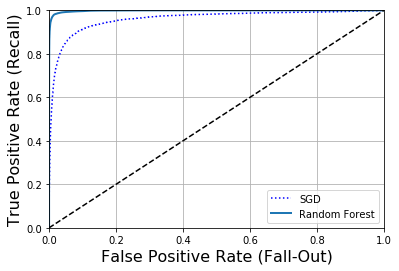

In [100]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(data_train_5_y,y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [101]:
roc_auc_score(data_train_5_y,y_scores_forest)

0.9983436731328145

In [ ]:
%%capture
"""
Binary Classifier Trained ! But i want it to detect all numbers not just 5 Hence we need to train a multiclass classifier

"""

In [102]:
# one-versus-all (OvA) & one-versus-one (OvO) i will use OvA
# Lets Create Multiclass Machine Classifier (:

In [103]:
sgd_model.fit(data_train_x, data_train_y)
sgd_model.predict([random_digit])

array([3], dtype=uint8)

In [104]:
some_digit_scores = sgd_model.decision_function([random_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [105]:
%%capture
# Result is not correct ! The returned response should be 5 not 3 ! multiclass Needs more work to be done on

In [106]:
#TODO: Train Multiclass Model !